## Twitterati and Climate Change 

### "Team Runtime Terror"

### Python Project - Group 14

#### Ankita Mittal, Divya Vakil, Shashank Puthanveedu

### Introduction:

Nowadays, Social Media is a place where the world comes together. But increasingly, it is becoming a place where people talk more and listen less. We are trying to listen to the voices and understand the demographics of the same. Trying to understand how the world is really reacting to the phenomenon of “Climate Change” on twitter.
Being the only living species with the technology and intelligence to prevent our own extinction, we should try and find a way to delay the process of climate change which has been accelerated by our actions. How better to start than by understanding where we are as a community on this issue and prepare based on that.


### Project Overview

Our project aims at understanding how different countries in the world are reacting to climate change on twitter and presenting an overview of what they think. We would be comparing the tweets from the countries listed above and trying to correlate our findings with the data available from the other websites. We would also be comparing the various initiatives and try and identify if the world is more sensitive to climate change initiatives now than before.

In [4]:
# Importing the required libraries for data extraction and cleaning
from bs4 import BeautifulSoup
import requests
import pandas as pd
from twitterscraper import query_tweets
import datetime as dt
from datetime import datetime, date, time, timedelta
import tweepy
import json
from tweepy import Cursor
import tabula
import re

INFO: {'User-Agent': 'Mozilla/5.0 (Windows NT 5.2; RW; rv:7.0a1) Gecko/20091211 SeaMonkey/9.23a1pre'}


In [5]:
# Importing the Plotting tools for vizualizations
%pylab inline
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import folium

Populating the interactive namespace from numpy and matplotlib


C:\Users\sputh\AppData\Roaming\Python\Python37\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
# Importing nltk package for word processing
import nltk
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
pd.set_option('max_columns', 40)
pd.set_option('colwidth', 300)
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sputh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sputh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sputh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Extraction

###### Scraping the wikipedia page for information on climate change awareness and prevention initiatives

Scraping the tabular data from wikipedia page that lists the various climate change initiatives made by different countries

In [4]:
# Setting up the basic scraping variables
wiki_url = 'https://en.wikipedia.org/wiki/List_of_climate_change_initiatives'
# Issue a simple HTTP request to get the webpage text
wiki_page = requests.get(wiki_url)

In [5]:
# Parsing the scraped page using beautiful soup html parser
wiki_page_soup = BeautifulSoup(wiki_page.text, 'html.parser')

In [6]:
# find all the tables from the data frame
wiki_table_list = wiki_page_soup.find_all(name="table", class_="wikitable")
wiki_table_rows = wiki_table_list[0].find_all(name="td")

In [7]:
initiative_df = pd.DataFrame(columns = ['Initiative_by','Initiative_name','Initiative_year'])
initiative_by_list = []
initiative_name_list = []
initiative_year_list = []

In [ ]:
for td in range(len(wiki_table_rows)):
    if td % 3 == 0:
        initiative_by_list.append(wiki_table_rows[td].text)
    elif td % 3 == 1:
        initiative_name_list.append(wiki_table_rows[td].text)
    elif td % 3 == 2:
        initiative_year_list.append(wiki_table_rows[td].text)

In [ ]:
wiki_table_2_rows = wiki_table_list[2].find_all(name="td")

In [ ]:
for td in range(len(wiki_table_2_rows)):
    if td % 2 == 0:
        initiative_by_list.append(wiki_table_2_rows[td].text)
    elif td % 2 == 1:
        initiative_name_list.append(wiki_table_2_rows[td].text) 
        initiative_year_list.append("No Data Found")

In [ ]:
initiative_df['Initiative_by'] = initiative_by_list
initiative_df['Initiative_name'] = initiative_name_list
initiative_df['Initiative_year'] = initiative_year_list

In [ ]:
# Saving Extracted data to CSV file for further use
initiative_df.to_csv('initiatives.csv', encoding='utf-8', index=False)

###### Twitter Auth Setup

We applied for twitter developer accounts and the credentials thus obtained were stored to a json file in our project directory. The passkeys are being populated from that json file.
These keys enable us to connect to twitter APIs and scrape data from twitter

In [9]:
# Get the access tokens and keys from the local file
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

In [10]:
# Authenticate with twitter APIs using OAuth
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

###### Scraping tweets on climate change between November 4, 2014 and November 4, 2019 using twitterscraper

In [ ]:
# Setting the begin and end dates for twitter scraping
begin_date = dt.date(2014,11,4)
end_date = dt.date(2019,11,4)
limit = 100000
lang = 'english'

# Querying for tweets about climate change in the required time frame
tweets = query_tweets("#climatechange", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)

In [ ]:
# Converting the tweet data received into Data Frame
df = pd.DataFrame(t.__dict__ for t in tweets)

In [ ]:
df.text.count()

In [ ]:
# Saving the extracted data to CSV for further use
df.to_csv('climate_change_tweets.csv', encoding='utf-8', index=False)

###### Getting tweets based on climate change along with location of tweet

In [ ]:
# Setting the search parameters
search_words = "climatechange"
date_since = "2019-01-01"

In [ ]:
# Tweepy enabled twitter scraping
tweets = tweepy.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(2500)

In [ ]:
# Getting the scraped twitter data into lists.
count =0
tweet_list =[]
for tweet in tweets:
    tweet_details =[]
    if(tweet.text):
        tweet_details.append(tweet.text)
    else:
        tweet_details.append('')
    if(tweet.user.name):
        tweet_details.append(tweet.user.name)
    else:
        tweet_details.append('')
    if(tweet.user.screen_name):
        tweet_details.append(tweet.user.screen_name)
    else:
        tweet_details.append('')
    if(tweet.user.location):
        tweet_details.append(tweet.user.location)
    else:
        tweet_details.append('')
    if(tweet.user.description):
        tweet_details.append(tweet.user.description)
    else:
        tweet_details.append('')
    if(tweet.user.followers_count):
        tweet_details.append(tweet.user.followers_count)
    else:
        tweet_details.append('')
    if(tweet.user.friends_count):
        tweet_details.append(tweet.user.friends_count)
    else:
        tweet_details.append('')
    if(tweet.user.verified):
        tweet_details.append(tweet.user.verified)
    else:
        tweet_details.append('')
    if(tweet.created_at):
        tweet_details.append(tweet.created_at)
    else:
        tweet_details.append('')
    tweet_list.append(tweet_details)

In [ ]:
# Using the lists created in above step to create a data frame
tweets_df = pd.DataFrame(tweet_list,columns = ['Tweet_Text', 'User_Name', 'Screen_Name', 'Location', 'Description', 'Followers_Count','Friends_Count','Verified_Account','Tweet_Created_At'])

In [ ]:
# Saving the extracted data in CSV file for further use
tweets_df.to_csv('climate_change_tweets_by_location.csv', encoding='utf-8', index=False)

###### Scrape tweets by the Leaders in their respective countries on climate change

We are scraping tweets by the various world leaders for the past 90 days. This includes two counts, total tweets and tweets made on climate change. 
The leaders were,
- Narendra Modi (India)
- Vladimir Putin (Russia)
- Scott Morrison (Australia)
- Donald Trump (USA)
- Stefan Löfven (Sweden)
- Justin Trudeau (Canada)
- Jair Bolsonaro (Brazil)

In [ ]:
famous_tweet_list = []
leader_list = ['narendramodi','KremlinRussia_E','ScottMorrisonMP','realDonaldTrump','SwedishPM','JustinTrudeau','jairbolsonaro']
for leader in leader_list:
    famous_tweet_list_1 = []
    user = api.get_user(leader)
    famous_tweet_list_1.append(user.screen_name)
    tweets = user.statuses_count
    hashtags = []
    tweet_count = 0
    climate_tweet_count = 0
    end_date = datetime.utcnow() - timedelta(days=90)
    for status in Cursor(api.user_timeline, id=leader).items():
        tweet_count += 1
        if hasattr(status, "text"):
            tweet_text = status.text
            if "climate change" in tweet_text:
                climate_tweet_count += 1
        if status.created_at < end_date:
            break
    famous_tweet_list_1.append(tweet_count)
    famous_tweet_list_1.append(climate_tweet_count)
    famous_tweet_list.append(famous_tweet_list_1)

In [ ]:
famous_tweets_df = pd.DataFrame(famous_tweet_list,columns = ['User_Name', 'Tweet_Count', 'Tweet_On_Climate_Change'])

In [ ]:
# Saving the extracted data in CSV file for further use
famous_tweets_df.to_csv('famous_user_tweets.csv', encoding='utf-8', index=False)

### Data Cleaning

#### Cleaning the cilmate change awareness and prevention initiatives data

In [176]:
initiative_df = pd.read_csv('initiatives.csv')

In [37]:
# removing \n newline character from each column in the dataframe
initiative_df.Initiative_by = initiative_df.Initiative_by.str.replace('\n','')
initiative_df.Initiative_year = initiative_df.Initiative_year.str.replace('\n','')
initiative_df.Initiative_name = initiative_df.Initiative_name.str.replace('\n','')

In [38]:
# Removing invalid data rows from the dataframe
initiative_df = initiative_df.iloc[2:].reset_index(drop= True)

In [39]:
initiative_df.head()

,Initiative_by,Initiative_name,Initiative_year
0,European Union,European Climate Change Programme,June 2000
1,Germany,The International Climate Initiative (IKI),2008
2,Germany,European Climate Initiative (EUKI)[3],2017
3,Australia,"Carbon tax in Australia, also known as the Cle...",No Data Found
4,Canada,Canada's Initiative,No Data Found


In [84]:
# Saving the clean data in CSV file for further use
initiative_df.to_csv('initiatives_clean.csv', encoding='utf-8', index=False)

#### Cleaning the tweet data for tweets between November 4, 2014 and November 4, 2019

In [50]:
period_tweets_df = pd.read_csv('climate_change_tweets.csv')

In [51]:
period_tweets_df = period_tweets_df.drop(columns = ['img_urls','links','text_html','video_url','tweet_url','has_media','user_id'])

In [52]:
# Replacing empty fields with standard text
period_tweets_df = period_tweets_df.replace(['[]'],['No Data Available'])

In [53]:
# Replacing NaN fields with standard text
period_tweets_df = period_tweets_df.fillna('No Data Available')

In [54]:
period_tweets_df.head(5)

,hashtags,is_replied,is_reply_to,likes,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,timestamp,timestamp_epochs,tweet_id,username
0,"['SCOTUS', 'climatechange']",False,False,0,No Data Available,0,No Data Available,0,alexvahdat,Big news on a Friday night. SCOTUS will not st...,11/2/2018 23:59,1541203173,1.058510e+18,Alex Vahdat
1,"['yvPjyG466gO0', 'ClimateChange', 'Environment']",False,False,2,No Data Available,0,No Data Available,2,TrueBlueLiberal,Earth’s carbon dioxide levels are likely the h...,11/2/2018 23:59,1541203160,1.058510e+18,True Blue Liberal
2,"['climatechange', 'beverages', 'cleancities', ...",False,False,0,No Data Available,0,No Data Available,0,Innovare4Water,"Free ice cream? And beer?! Yes, please! We lik...",11/2/2018 23:59,1541203149,1.058510e+18,Judith Marquez | The Grease Trapper
3,"['TheMashReport', 'Brexit', 'Trump', 'ClimateC...",False,False,1,No Data Available,0,No Data Available,0,KasiaGreenwood,I love #TheMashReport! Good to see you back @M...,11/2/2018 23:58,1541203119,1.058510e+18,Kasia Greenwood 🔶️
4,"['climatechange', 'sciencematters']",False,True,0,1.05425e+18,0,"[{'screen_name': 'TroglomyteT', 'user_id': '93...",0,GeraldKutney,For the latest views of NASA on climate change...,11/2/2018 23:58,1541203113,1.058510e+18,Gerald Kutney


In [83]:
# Saving the clean data in CSV file for further use
period_tweets_df.to_csv('climate_change_tweets_clean.csv', encoding='utf-8', index=False)

#### Cleaning the tweet data for tweets with their locations

In [56]:
location_tweets_df = pd.read_csv('climate_change_tweets_by_location.csv')

In [59]:
# Dropping the redundant column in the data
location_tweets_df = location_tweets_df.drop(columns = ['Location'])

In [66]:
# Fill the NaN Value with standard text
location_tweets_df.Verified_Account = location_tweets_df.Verified_Account.fillna('FALSE')
location_tweets_df.Tweet_Text = location_tweets_df.Tweet_Text.fillna('No Data Available')
location_tweets_df.User_Name = location_tweets_df.User_Name.fillna('No Data Available')
location_tweets_df.Screen_Name = location_tweets_df.Screen_Name.fillna('No Data Available')
location_tweets_df.Description = location_tweets_df.Description.fillna('No Data Available')
location_tweets_df.Followers_Count = location_tweets_df.Followers_Count.fillna('No Data Available')
location_tweets_df.Friends_Count = location_tweets_df.Friends_Count.fillna('No Data Available')
location_tweets_df.Verified_Account = location_tweets_df.Verified_Account.fillna('No Data Available')
location_tweets_df.Tweet_Created_At = location_tweets_df.Tweet_Created_At.fillna('No Data Available')

In [69]:
# Drop other rows in NaN Values
location_tweets_df = location_tweets_df.dropna()

In [72]:
location_tweets_df.head()

,Tweet_Text,User_Name,Screen_Name,Country,Description,Followers_Count,Friends_Count,Verified_Account,Tweet_Created_At
0,RT @EIB: Only one day left before #COP25! ðŸ’š...,##COP25Madrid #COP25 Ellyanne Wanjiku Chlystun,EllyanneCGithae,Kenya,9 Year Old Youngest #CLIMATECHANGE AMB. CEO Ch...,6826,3120,FALSE,12/1/19 20:37
1,RT @PaulEDawson: 58.4 % of all new cars sold i...,ðŸ’§â˜”ï¸ðŸ€ðŸŒ±maz wrightðŸ³ï¸â€ðŸŒˆ#Iam...,gramazzy4,Australia,Becoming more interested in politics since thi...,472,690,FALSE,12/1/19 20:37
3,RT @PaulEDawson: 58.4 % of all new cars sold i...,gail simmons,jurylady5,Australia,"Interested in world affairs, communication, ed...",16167,17776,FALSE,12/1/19 20:36
5,RT @PaulEDawson: 58.4 % of all new cars sold i...,Lin Anderson,Lin_Anderson,United Kingdom,"A free spirit. Also crime writer, screenwriter...",14265,14251,FALSE,12/1/19 20:36
7,RT @AllanMargolin: As Christmas Gets Closer Sa...,Sharon Peter,Smp7665,United States,Born and raised in SoCal; retired court report...,2136,2321,FALSE,12/1/19 20:36


In [82]:
# Saving the clean data in CSV file for further use
location_tweets_df.to_csv('climate_change_tweets_by_location_clean.csv', encoding='utf-8', index=False)

#### Cleaning famous user tweet data

In [74]:
famous_tweets_df = pd.read_csv('famous_user_tweets.csv')

In [77]:
# No Cleaning needed
famous_tweets_df

,User_Name,Tweet_Count,Tweet_On_Climate_Change
0,narendramodi,965,1
1,KremlinRussia_E,247,0
2,ScottMorrisonMP,134,0
3,realDonaldTrump,60,0
4,SwedishPM,23,0
5,JustinTrudeau,1458,27
6,jairbolsonaro,724,0


In [81]:
# Saving the clean data in CSV file for further use
famous_tweets_df.to_csv('famous_user_tweets_clean.csv', encoding='utf-8', index=False)

#### Cleaning the ranking and climate index data from CCPI website

In [9]:
ccpi_score = tabula.read_pdf("CCPI-2019-Results.pdf", multiple_tables=True,pages= 4, pandas_options={'header': 'infer' })

ccpi =ccpi_score[0]
ccpi.head()

,,,,Rank,Country,Score**,
0,NaN,NaN,NaN,1.*,–,–,NaN
1,NaN,NaN,NaN,2.,–,–,NaN
2,NaN,NaN,NaN,3.,–,–,NaN
3,NaN,NaN,NaN,4. –,Sweden,76.28,NaN
4,NaN,NaN,NaN,5. ▲,Morocco,70.48,NaN


In [10]:
ccpi = ccpi[['Rank','Country','Score**']]
ccpi.rename(columns={'Score**':'Score'}, inplace=True)
ccpi = ccpi.dropna()
ccpi.head()

C:\Users\sputh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Rank,Country,Score
0,1.*,–,–
1,2.,–,–
2,3.,–,–
3,4. –,Sweden,76.28
4,5. ▲,Morocco,70.48


In [11]:
#extracting greenhouse table

greenhouse_score = tabula.read_pdf("CCPI-2019-Results.pdf", multiple_tables=True,pages= 5, pandas_options={'header': 1})
greenhouse = greenhouse_score[0]
greenhouse.head()

,,,,Rank Country Score Overall GHG per Capita,GHG per Capita,GHG per Capita,GHG 2030 target
0,NaN,NaN,NaN,Greenhouse Gas Emissions – Rating Table for G20 countries*,NaN,NaN,NaN
1,NaN,NaN,NaN,Rating - current level,- current trend,- compared to a,- compared to a
2,NaN,NaN,NaN,(excl. LULUCF),(excl. LULUCF),well-below-2°C,well-below-2°C
3,NaN,NaN,NaN,NaN,NaN,pathway,pathway
4,NaN,NaN,NaN,7. United Kingdom 75.9 High Medium,High,Medium,High


In [12]:
#extracting desired columns from greenhouse

greenhouse = greenhouse[['Rank Country Score Overall GHG per Capita']]
greenhouse.head()

,Rank Country Score Overall GHG per Capita
0,Greenhouse Gas Emissions – Rating Table for G20 countries*
1,Rating - current level
2,(excl. LULUCF)
3,NaN
4,7. United Kingdom 75.9 High Medium


In [13]:
#extracting renewable energy score table

renewable_energy_score = tabula.read_pdf("CCPI-2019-Results.pdf", multiple_tables=True,pages= 6,stream=True, guess=False, pandas_options={'header': 3})
renewable_energy_score = pd.DataFrame(renewable_energy_score[0])
renewable_energy_score.head()

,,Rank Country Score Overall Share of RE,Share of RE,Share of RE in RE 2030 Target
0,"CCPI • Results 2019 Germanwatch, NewClimate Institute & Climate Action Network",CCPI • Results 2019,NaN,"Germanwatch, NewClimate Institute & Climate Action Network"
1,3.2 Category Results – Renewable Energy,NaN,NaN,NaN
2,NaN,Renewable Energy (RE) – Rating Table for G20 Countries*,NaN,NaN
3,NaN,Ranking in Energy Use,in Energy Use,Energy Use (TPES) (incl. hydro) -
4,NaN,(TPES) -,(TPES) -,(excl. hydro) - compared to a


In [14]:
#extracting desired columns from renewable energy score

renewable_energy_score = renewable_energy_score[['Rank Country Score Overall Share of RE']]
renewable_energy_score.head()

,Rank Country Score Overall Share of RE
0,CCPI • Results 2019
1,NaN
2,Renewable Energy (RE) – Rating Table for G20 Countries*
3,Ranking in Energy Use
4,(TPES) -


In [15]:
#extracting energy usage table

energy_use = tabula.read_pdf("CCPI-2019-Results.pdf", multiple_tables=True,pages= 7,stream=True, guess=False, pandas_options={'header': 3})
energy_use = energy_use[0]
energy_use.head()

,,Rank Country Score Overall,Energy Use,Energy Use,,Energy Use Energy Use
0,"CCPI • Results 2019 Germanwatch, NewClimate Institute & Climate Action Network",CCPI • Results 2019,NaN,NaN,NaN,"Germanwatch, NewClimate Institute & Climate Action Network"
1,3.3 Category Results – Energy Use,NaN,NaN,NaN,NaN,NaN
2,NaN,Energy Use – Rating Table for G20 Countries*,NaN,NaN,NaN,NaN
3,NaN,Rating,(TPES)**,(TPES),NaN,(TPES) per Capita 2030 Target
4,NaN,NaN,per Capita -,per Capita -,NaN,- compared to a - compared to a


In [16]:
#extracting desired columns from energy usage table
energy_use = energy_use[['Rank Country Score Overall']]
energy_use.head()

,Rank Country Score Overall
0,CCPI • Results 2019
1,NaN
2,Energy Use – Rating Table for G20 Countries*
3,Rating
4,NaN


In [17]:
#extracting climate policy score table

climate_policy = tabula.read_pdf("CCPI-2019-Results.pdf", multiple_tables=True,pages= 8,stream=True, guess=False, pandas_options={'header': 3})#, 'names':column_name})
climate_policy = climate_policy[0]
climate_policy.head()

,,Rank Country Score,Overall Rating,National,International
0,"CCPI • Results 2019 Germanwatch, NewClimate Institute & Climate Action Network",CCPI • Results 2019,NaN,NaN,"Germanwatch, NewClimate Institute & Climate Action Network"
1,3.4 Category Results – Climate Policy,NaN,NaN,NaN,NaN
2,NaN,Climate Policy – Rating Table for all Countries,NaN,NaN,NaN
3,NaN,NaN,NaN,Climate Policy,Climate Policy
4,NaN,NaN,NaN,Performance,Performance


In [18]:
#extracting desired columns from climate policy score table

climate_policy = climate_policy[['Rank Country Score','Overall Rating']]
climate_policy.head()

,Rank Country Score,Overall Rating
0,CCPI • Results 2019,NaN
1,NaN,NaN
2,Climate Policy – Rating Table for all Countries,NaN
3,NaN,NaN
4,NaN,NaN


In [19]:
#function to clean overall column in each dataframe
#which is merged with other columns

def clean(row):
    list_of_words = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    words_re = re.compile("|".join(list_of_words))
    if words_re.search(row):
        x = words_re.search(row).group(0)
        row = x
    return row


##### Greenhouse score

In [20]:
#splitting column which has multiple column values in one based on '.'
greenhouse[['Rank', 'Country', 'Score']] = greenhouse['Rank Country Score Overall GHG per Capita'].str.split('\.', expand=True)

C:\Users\sputh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
#replacing old dataframe with new one
greenhouse = greenhouse[['Rank','Country','Score']]

#dropping intial rows based on noisy data
greenhouse = greenhouse.drop([0,1,2,3])

greenhouse.reset_index(inplace=True)
greenhouse = greenhouse.dropna()

#type casting for cleaning data 
greenhouse = greenhouse.astype({'Rank': int, 'Country' : str, 'Score' : str})

#separating int part of the score into a new column
greenhouse['Score_int'] = greenhouse['Country'].apply(lambda x: x[-2:])

#seperating high low medium from string
greenhouse['Overall'] = greenhouse['Score'].apply(lambda x: x[2:])
greenhouse['Score'] = greenhouse['Score'].apply(lambda x: x[:2])

#claculating final score by joining the integer part ('Score_int') and fractional part ('score') to get result such as 12.3 
greenhouse['Final_score'] = greenhouse[['Score_int', 'Score']].apply(lambda x: '.'.join(x), axis=1)

#cleaning out the overall value of the rank and score based on the first value in the string
#eg high low very high (data of 3 columns combined), overall value will be - high
greenhouse['Overall'] = greenhouse['Overall'].apply(lambda x : clean(x))

In [22]:
#extracting final table with desired columns from cleaned dataframe

greenhouse = greenhouse[['Rank','Country','Final_score','Overall']]
greenhouse.head()

,Rank,Country,Final_score,Overall
0,7,United Kingdom 75,75.9,High
1,12,India 71,71.8,High
2,18,Italy 67,67.0,Medium
3,22,France 62,62.1,Medium
4,23,European Union (28) 61,61.6,Medium


In [47]:
greenhouse['Country'] = greenhouse['Country'].str.extract('([A-Za-z]+)', expand=False)
greenhouse['Country'] = greenhouse['Country'].str.replace(' ','')

In [48]:
greenhouse.head()

,Rank,Country,Final_score,Overall
0,7,United,75.9,High
1,12,India,71.8,High
2,18,Italy,67.0,Medium
3,22,France,62.1,Medium
4,23,European,61.6,Medium


In [53]:
# Saving the clean data in CSV file for further use
greenhouse.to_csv('greenhouse_clean.csv', encoding='utf-8', index=False)

##### Renewable energy score 

In [23]:
#splitting column which has multiple column values in one based on '.'
renewable_energy_score[['Rank', 'Country', 'Score']] = renewable_energy_score['Rank Country Score Overall Share of RE'].str.split('\.', expand=True)

#replacing old dataframe with new one
renewable_energy_score = renewable_energy_score[['Rank','Country','Score']]

#dropping intial rows based on noisy data
renewable_energy_score = renewable_energy_score.drop([0,1,2,3])

renewable_energy_score = renewable_energy_score.dropna()
renewable_energy_score.reset_index(inplace=True)

In [24]:
#Dropping the row at index 20 becuase of noisy data
renewable_energy_score = renewable_energy_score.drop([renewable_energy_score.index[20]])

#type casting for cleaning data 
renewable_energy_score = renewable_energy_score.astype({'Rank': int, 'Country' : str, 'Score' : str})

#separating int part of the score into a new column
renewable_energy_score['Score_int']= renewable_energy_score['Country'].apply(lambda x: x[-2:])

#seperating high low medium from string
renewable_energy_score['Overall'] = renewable_energy_score['Score'].apply(lambda x: x[2:])
renewable_energy_score['Score'] = renewable_energy_score['Score'].apply(lambda x: x[:2])

#claculating final score by joining the integer part ('Score_int') and fractional part ('score') to get result such as 12.3 
renewable_energy_score['Final_score'] = renewable_energy_score[['Score_int']].apply(lambda x: '.'.join(x), axis=1)

#cleaning out the overall value of the rank and score based on the first value in the string
#eg high low very high (data of 3 columns combined), overall value will be - high
renewable_energy_score['Overall'] = renewable_energy_score['Overall'].apply(lambda x : clean(x))

In [25]:
#extracting final table with desired columns from cleaned dataframe

renewable_energy_score = renewable_energy_score[['Rank','Country','Final_score','Overall']]
renewable_energy_score.head()

,Rank,Country,Final_score,Overall
0,11,Brazil 54,54,High
1,15,Turkey 47,47,High
2,20,Italy 38,38,Medium
3,21,Germany 37,37,Medium
4,22,European Union (28) 37,37,Medium


In [44]:
renewable_energy_score['Country'] = renewable_energy_score['Country'].str.extract('([A-Za-z]+)', expand=False)
renewable_energy_score['Country'] = renewable_energy_score['Country'].str.replace(' ','')

In [45]:
renewable_energy_score.head()

,Rank,Country,Final_score,Overall
0,11,Brazil,54,High
1,15,Turkey,47,High
2,20,Italy,38,Medium
3,21,Germany,37,Medium
4,22,European,37,Medium


In [52]:
# Saving the clean data in CSV file for further use
renewable_energy_score.to_csv('renewable_energy_clean.csv', encoding='utf-8', index=False)

##### Energy usage score 

In [26]:
#splitting column which has multiple column values in one based on '.'
energy_use[['Rank', 'Country', 'Score']] = energy_use['Rank Country Score Overall'].str.split('\.', expand=True)
#replacing old dataframe with new one                                                      
energy_use = energy_use[['Rank','Country','Score']]
                                                      
#dropping intial rows based on noisy data                                                      
energy_use = energy_use.drop([0,1,2,3])
energy_use = energy_use.dropna()
                                                      
energy_use.reset_index(inplace=True)                                                                                 

In [27]:
#Dropping the row at index 19 becuase of noisy data
energy_use = energy_use.drop([renewable_energy_score.index[19]])

#type casting for cleaning data 
energy_use = energy_use.astype({'Rank': int, 'Country' : str, 'Score' : str})

#separating int part of the score into a new column
energy_use['Score_f'] = energy_use['Country'].apply(lambda x: x[-2:])

#seperating high low medium from string
energy_use['Overall'] = energy_use['Score'].apply(lambda x: x[2:])
energy_use['Score'] = energy_use['Score'].apply(lambda x: x[:2])

#claculating final score by joining the integer part ('Score_int') and fractional part ('score') to get result such as 12.3 
energy_use['Final_score'] = energy_use[['Score_f', 'Score']].apply(lambda x: '.'.join(x), axis=1)

#cleaning out the overall value of the rank and score based on the first value in the string
#eg high low very high (data of 3 columns combined), overall value will be - high
energy_use['Overall'] = energy_use['Overall'].apply(lambda x : clean(x))

In [40]:
#extracting final table with desired columns from cleaned dataframe

energy_use = energy_use[['Rank','Country','Final_score','Overall']]
energy_use.head()

,Rank,Country,Final_score,Overall
0,10,India 72,72.3,High
1,11,Mexico 71,71.7,High
2,18,Italy 65,65.0,High
3,19,Brazil 65,65.0,High
4,20,United Kingdom 64,64.7,Medium


In [41]:
energy_use['Country'] = energy_use['Country'].str.extract('([A-Za-z]+)', expand=False)
energy_use['Country'] = energy_use['Country'].str.replace(' ','')

In [42]:
energy_use.head()

,Rank,Country,Final_score,Overall
0,10,India,72.3,High
1,11,Mexico,71.7,High
2,18,Italy,65.0,High
3,19,Brazil,65.0,High
4,20,United,64.7,Medium


In [51]:
# Saving the clean data in CSV file for further use
energy_use.to_csv('energy_use_clean.csv', encoding='utf-8', index=False)

##### Climate Policy Score

In [29]:
#splitting column which has multiple column values in one based on '.'
climate_policy[['Rank', 'Country', 'Score']] = climate_policy['Rank Country Score'].str.split('\.', expand=True)

#replacing old dataframe with new one                                                      
climate_policy = climate_policy[['Rank','Country','Score', 'Overall Rating']]

#dropping intial rows based on noisy data
climate_policy = climate_policy.drop([0,1,2,3])

climate_policy = climate_policy.dropna()
climate_policy.reset_index(inplace=True)

#type casting for cleaning data 
climate_policy = climate_policy.astype({'Rank': int, 'Country' : str, 'Score' : str})

#separating int part of the score into a new column
climate_policy['Score_f'] = climate_policy['Country'].apply(lambda x: x[-2:])

#claculating final score by joining the integer part ('Score_int') and fractional part ('score') to get result such as 12.3 
climate_policy['Final_score'] = climate_policy[['Score_f', 'Score']].apply(lambda x: '.'.join(x), axis=1)

#renaming the Overall Rating data
climate_policy.rename(columns={'Overall Rating':'Overall'}, inplace=True)

In [30]:
#extracting final table with desired columns from cleaned dataframe

climate_policy = climate_policy[['Rank','Country','Final_score','Overall']]
climate_policy.head()

,Rank,Country,Final_score,Overall
0,4,Portugal 98,98.4,High
1,5,France 90,90.9,High
2,6,Netherlands 90,90.8,High
3,7,Sweden 88,88.3,High
4,8,Morocco 87,87.6,High


In [36]:
climate_policy['Country'] = climate_policy['Country'].str.extract('([A-Za-z]+)', expand=False)
climate_policy['Country'] = climate_policy['Country'].str.replace(' ','')

In [38]:
climate_policy.head()

,Rank,Country,Final_score,Overall
0,4,Portugal,98.4,High
1,5,France,90.9,High
2,6,Netherlands,90.8,High
3,7,Sweden,88.3,High
4,8,Morocco,87.6,High


In [39]:
# Saving the clean data in CSV file for further use
climate_policy.to_csv('climate_policy_clean.csv', encoding='utf-8', index=False)

### Data Vizualization

#### How are people from different countries reacting on twitter.

Use the tweets scraped by country to create a map of the world with color gradient to indicate how they perform on number of tweets made about climate change.

In [7]:
location_tweets_df = pd.read_csv('climate_change_tweets_by_location_clean.csv')

In [8]:
tweets_count_by_country = location_tweets_df.groupby(by='Country')['User_Name'].count().reset_index()

In [9]:
tweets_count_by_country.head()

,Country,User_Name
0,Afghanistan,1
1,Argentina,4
2,Australia,77
3,Austria,4
4,Bahrain,2


In [10]:
tweets_count_by_country_ratio = pd.read_csv('tweets_by_country_viz.csv')

In [11]:
tweets_count_by_country_ratio['Ratio'] = tweets_count_by_country_ratio['User_Name']/tweets_count_by_country_ratio['Twitter_Users_2019']

In [12]:
# Load the shape of the zone
country_geo = 'world-map.json'

# Initialize the map:
m = folium.Map(location=[37, -10], zoom_start= 2)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=tweets_count_by_country_ratio,
 columns=['Country', 'User_Name'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Proportion of tweets by active users'
)
folium.LayerControl().add_to(m)
# Display the map
m

C:\Users\sputh\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



The above map shows the counries and the number of tweets they made is color coded using shades of the color green.
Below are a few points worth noting,
- The countries shown in black are the countries for which the tweet data was not available
- USA has the most tweets about climate change. They have been the most active on twitter
- But that does not mean that they care the most. They may be having large volume of tweets because USA is the largest user base for twitter. 
- The next vizualization provides a better perspective

In [13]:
# Load the shape of the zone
country_geo = 'world-map.json'

# Initialize the map:
m = folium.Map(location=[37, -10], zoom_start= 2)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=tweets_count_by_country_ratio,
 columns=['Country', 'Ratio'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Proportion of tweets by active users'
)
folium.LayerControl().add_to(m)
# Display the map
m

The above map shows the counries and the number of tweets they made as a ratio of the total active users they have on twitter is color coded using shades of the color green. For example, the Ratio for USA is equal to the total tweets on climate change divided by the total active twitter users in USA. Thus, the value is the proportion of active population that is talking about climate change for each country.
Below are a few points worth noting,
- USA no longer is the most active country in terms of the proportion
- Australia, Canada perform much better than them
- This could be taken as an indication of how people from these countries are reacting to climate change

#### Most frequently used words in tweets about climate change in 2019

In [193]:
def get_key_words(tweet_id, report='Tweet_Text'):
    # Fetch tweet information
    tweet = location_tweets_df.loc[tweet_id]
    # Extract report from twitter data frame
    s = location_tweets_df.at[tweet_id, report]
    
    # Convert text to lower case
    s = s.lower()
    
    # Remove unnecessary punctuation
    s = re.sub('[,()]', '', s)
    s = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", s)
    
    # Regular expression tokenization - Method 1
    words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
    words = [word for word in words if word.isalpha() if word not in stopwords.words('english') if word not in ["climatechange","&amp","year","climate","rt","new","change"]]
    
    # Lemmatizataion
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    
    return words

In [194]:
# Process strength reports and assemble into corpus
reports = []
for tweet_id in location_tweets_df.index:
    if type(location_tweets_df.at[tweet_id, 'Tweet_Text']) == str:
        reports.append(get_key_words(tweet_id))

In [195]:
# Define dictionary of scouting reports
D = Dictionary(reports)

In [196]:
# Create corpus
corpus = [D.doc2bow(report) for report in reports]

In [201]:
# Determine total word counts across the entire corpus

# Create the defaultdict: total_word_count
WC = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    WC[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
word_counts = sorted(WC.items(), key=lambda w: w[1], reverse=True) 

In [199]:
# Assemble all words with frequencies for Word Cloud
all_words = []
for word_id, word_count in word_counts:
    all_words.extend([D.get(word_id)] * word_count)

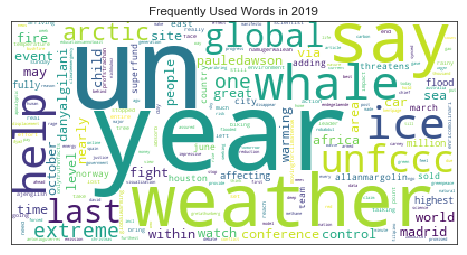

In [200]:
# Word Cloud
wc = WordCloud(background_color='white', collocations=False).generate(' '.join(all_words))
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)
plt.title('Frequently Used Words in 2019');

The above wordcloud visualization tries to highlight the words that were most frequently seen in the tweets about climate change in 2019. Some of the most frequent words were, UN, weather, whale, ice, global, help, extreme. The other intersting words that could be seen are sea, flood, arctic and warming.

This shows us that the people in the world are reacting to the climate change in a coherent voice. They are concerned about the global warming, melting ice, extreme weather events, whale/other animal extinctions. 

We can also see the words like pauledawson which is the twitter handle of a climate change activist from Sweden. This shows that the people on twitter are aware of the work of the activists and they do talk about them


#### Proportion of tweets about climate change by world leaders

In [202]:
famous_tweets_df = pd.read_csv('famous_user_tweets_clean.csv')

In [203]:
famous_tweets_df

,User_Name,Tweet_Count,Tweet_On_Climate_Change
0,narendramodi,965,1
1,KremlinRussia_E,247,0
2,ScottMorrisonMP,134,0
3,realDonaldTrump,60,0
4,SwedishPM,23,0
5,JustinTrudeau,1458,27
6,jairbolsonaro,724,0


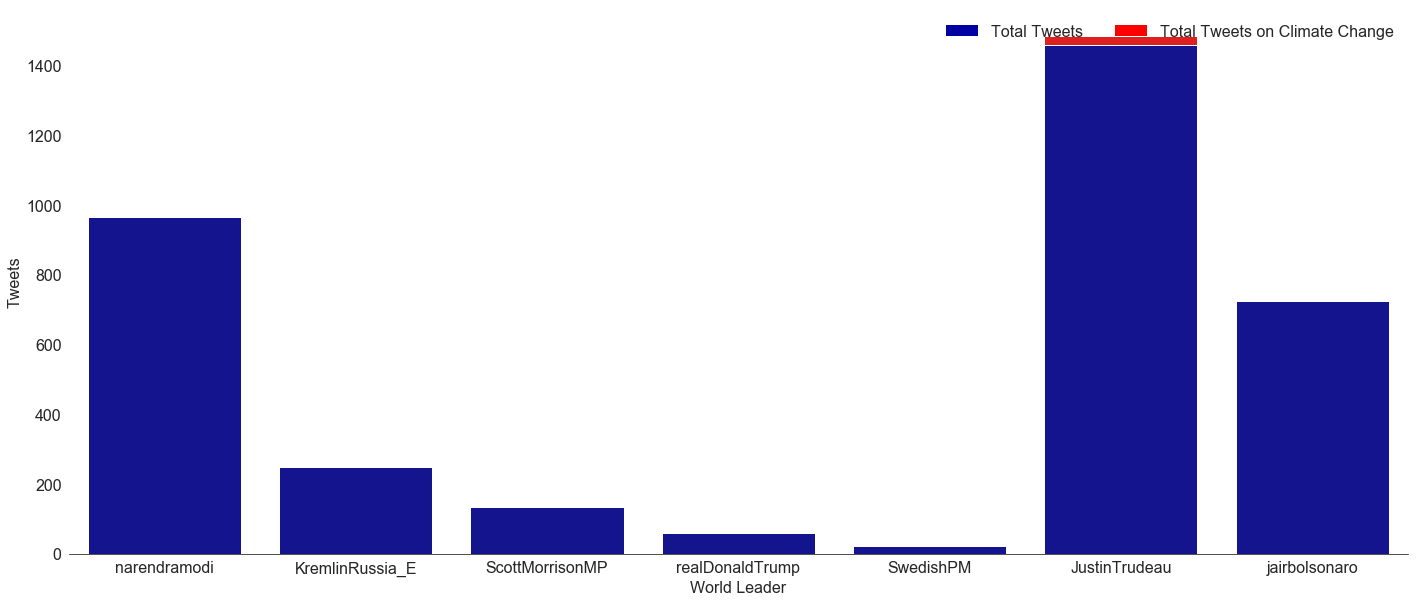

In [204]:
famous_tweets_df["total"] = famous_tweets_df.Tweet_Count + famous_tweets_df.Tweet_On_Climate_Change

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = famous_tweets_df.User_Name, y = famous_tweets_df.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x =  famous_tweets_df.User_Name, y = famous_tweets_df.Tweet_Count, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Total Tweets', 'Total Tweets on Climate Change'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Tweets")
bottom_plot.set_xlabel("World Leader")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

The above bar graph shows the tweets made by the leaders of various countries. It tries to show the relation between the total number of tweets they made and the number of tweets they made on climate change in the past 90 days.

We find that except for the Canadian PM Justin Trudeau, none of the other leaders really talk about climate change. Even the proportion of tweets by Justin Trudeau is not encouraging. 

The leaders must talk more and more about the effects and causes of climate change as they are the policy makers and decision makers. As our representatives they should echo our thoughts.

#### Popular hashtags from tweets about climate change between November 4, 2014 and November 4, 2019

In [205]:
period_tweets_df = pd.read_csv('climate_change_tweets_clean.csv')

In [206]:
period_tweets_df.head(2)

,hashtags,is_replied,is_reply_to,likes,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,timestamp,timestamp_epochs,tweet_id,username
0,"['SCOTUS', 'climatechange']",False,False,0,No Data Available,0,No Data Available,0,alexvahdat,Big news on a Friday night. SCOTUS will not stop kids' climate change case. #SCOTUS #climatechange https://twitter.com/chrisgeidner/status/1058489328073146370 …,11/2/2018 23:59,1541203173,1.058510e+18,Alex Vahdat
1,"['yvPjyG466gO0', 'ClimateChange', 'Environment']",False,False,2,No Data Available,0,No Data Available,2,TrueBlueLiberal,Earth’s carbon dioxide levels are likely the highest they've been in 15 million years https://mashable.com/article/climate-change-carbon-pollution-15-million-years/#yvPjyG466gO0 … via @mashable #ClimateChange #Environment,11/2/2018 23:59,1541203160,1.058510e+18,True Blue Liberal


In [207]:
def get_hashtags(tweet_id, report='hashtags'):

    tweet = period_tweets_df.loc[tweet_id]

    s = period_tweets_df.at[tweet_id, report]
    
    # Convert text to lower case
    s = s.lower()
    
    # Remove unnecessary punctuation
    s = re.sub("[,()]'", '', s)
  
    # Regular expression tokenization - Method 1
    words = regexp_tokenize(s, '[^. ]+')
    
    # Filter stop words from tokenized words
    words = [word for word in words if word not in stopwords.words('english') if word not in ["climatechange'","&amp","year","climate","rt","new","change"]]
    
    # Lemmatizataion
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    
    return words

In [209]:
# Process strength reports and assemble into corpus
reports = []
for tweet_id in period_tweets_df.index:
    if type(period_tweets_df.at[tweet_id, 'hashtags']) == str:
        reports.append(get_hashtags(tweet_id))

In [210]:
# Define dictionary of scouting reports
D = Dictionary(reports)

In [211]:
# Create corpus
corpus = [D.doc2bow(report) for report in reports]

In [213]:
# Determine total word counts across the entire corpus

# Create the defaultdict: total_word_count
WC = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    WC[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
word_counts = sorted(WC.items(), key=lambda w: w[1], reverse=True) 


In [214]:
# Assemble all words with frequencies for Word Cloud
all_words = []
for word_id, word_count in word_counts:
    all_words.extend([D.get(word_id)] * word_count)

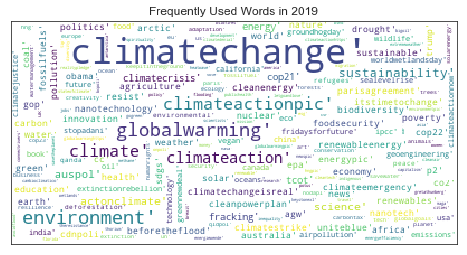

In [215]:
# Word Cloud
wc = WordCloud(background_color='white', collocations=False).generate(' '.join(all_words))
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)
plt.title('Frequently Used Hashtags between 2014 and 2019');

The above Wordcloud highlights the most popular hashtags in the tweets from 2014 to 2019. Apart from the popular hashtag "climatechange" the other popular hashtags include globalwarming, climateactionpic, climateaction, environment, sunstainability.

There are also hashtags like cleanenergy, cleanpowerplan, renewables, green that depict the inclination of the people towards moving to cleaner and greener energy sources.

We can also see hashtags like, parisagreement, cop22, cop21, gop, spcc which are the vaious climate summits and agreements made in the world. This shows that twitterati care about these agreements and are also local about their opinions regarding the same.

#### The fluctuations in number of tweets about climate change from November 4, 2014 to November 4, 2019

In [216]:
period_tweets_df['timestamp Year'] = pd.DatetimeIndex(period_tweets_df['timestamp']).year

In [217]:
period_tweet_graph = period_tweets_df.groupby(by='timestamp Year')['username'].count().reset_index()

In [218]:
period_tweet_graph.head()

,timestamp Year,username
0,2015,20032
1,2016,17448
2,2017,16936
3,2018,11232
4,2019,17334


[]

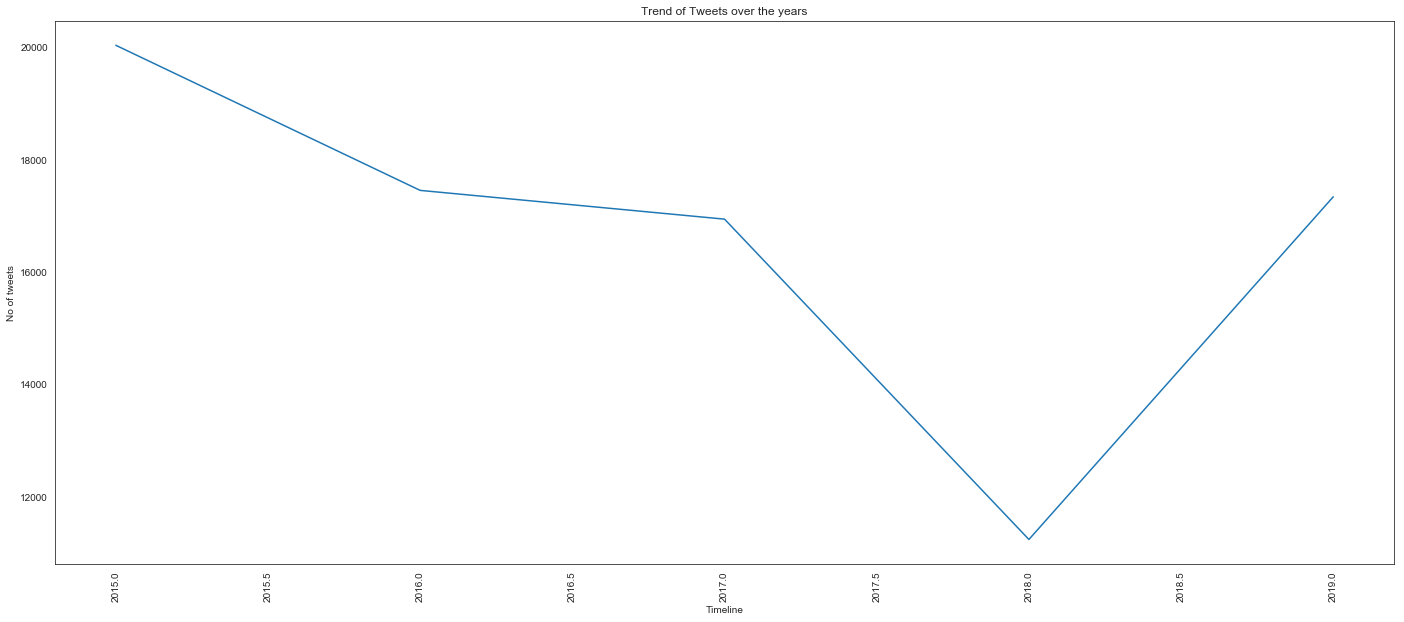

In [219]:
# Plotting a line graph
plt.plot(period_tweet_graph['timestamp Year'],period_tweet_graph['username']);
plt.xlabel('Timeline')
plt.ylabel('No of tweets')
plt.title('Trend of Tweets over the years')
plt.xticks(rotation='vertical')
plt.plot()

The above graph shows the number of tweets per year as a line chart.

We can see that the most activity was seen in 2015 and then it has been gradually decreasing with a huge dip in 2018. This may be due to inaction by people, their indifference and focus on other pressing matters of discussion. 
We can see that in 2019 there has been an increase in the chatter on climate change due to the various climate activism initiatives and efforts to spread awareness on various platforms.

#### Major Climate Change Initiatives by Country

In [220]:
initiative_df = pd.read_csv('initiatives_clean.csv')

In [221]:
initiative_df.head()

,Initiative_by,Initiative_name,Initiative_year
0,European Union,European Climate Change Programme,June 2000
1,Germany,The International Climate Initiative (IKI),2008
2,Germany,European Climate Initiative (EUKI)[3],2017
3,Australia,"Carbon tax in Australia, also known as the Clean Energy Plan",No Data Found
4,Canada,Canada's Initiative,No Data Found


In [222]:
initiative_graph = initiative_df.groupby(by='Initiative_by')['Initiative_name'].count().reset_index()

In [223]:
initiative_graph

,Initiative_by,Initiative_name
0,Australia,1
1,Canada,1
2,European Union,1
3,Germany,2
4,New Zealand,1
5,Nigeria,1
6,South Africa,1
7,United Kingdom,1
8,United States,1


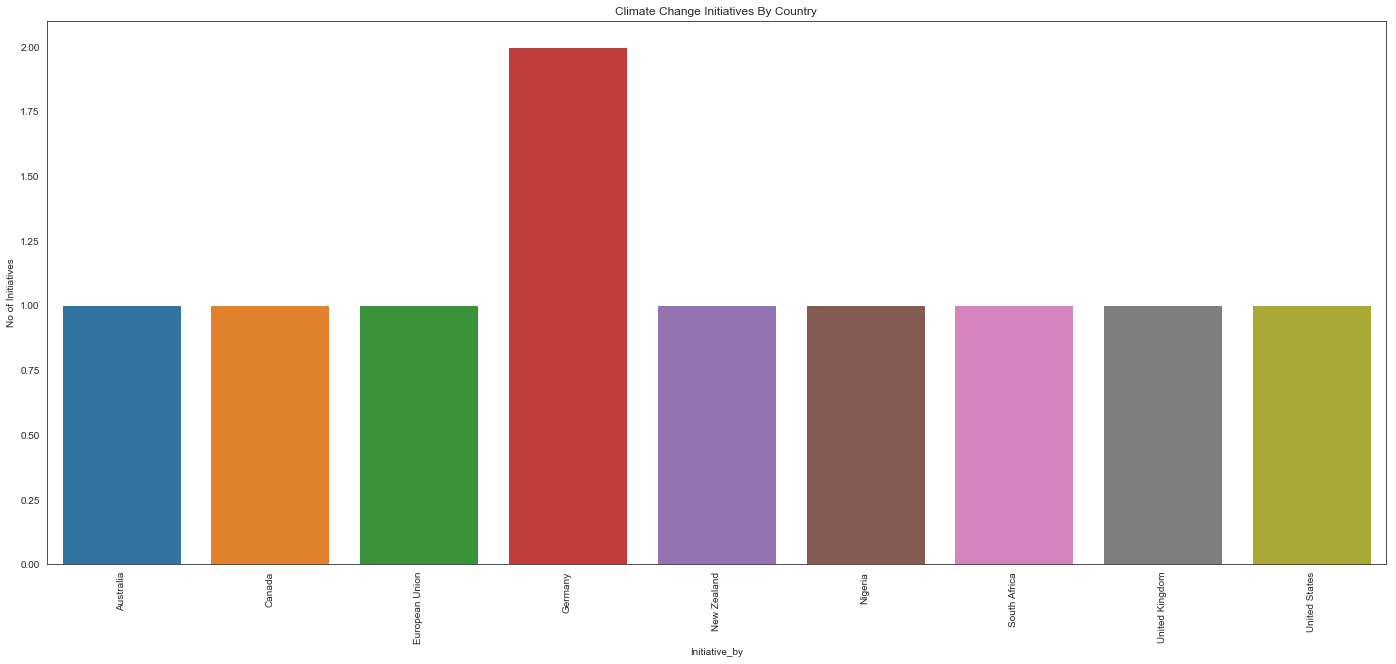

In [224]:
sns.barplot(x=initiative_graph.Initiative_by, y=initiative_graph.Initiative_name);
plt.ylabel('No of Initiatives')
plt.title('Climate Change Initiatives By Country')
plt.xticks(rotation='vertical');

The above graph shows the number of climate initiatives taken by the various countries of the world.

#### Correlation between twitter activity and CCPI index values for various countries

In [5]:
climate_policy = pd.read_csv('climate_policy_clean.csv')

In [6]:
energy_use = pd.read_csv('energy_use_clean.csv')

In [7]:
greenhouse = pd.read_csv('greenhouse_clean.csv')

In [8]:
renewable_energy_score = pd.read_csv('renewable_energy_clean.csv')

In [9]:
climate_policy.head(2)

,Climate_Policy_Rank,Country,Climate_Policy_Score,Climate_Policy_Overall
0,4,Portugal,98.4,High
1,5,France,90.9,High


In [10]:
greenhouse.head(2)

,Greenhouse_Rank,Country,Greenhouse_Score,Greenhouse_Overall
0,7,United,75.9,High
1,12,India,71.8,High


In [11]:
energy_use.head(2)

,Energy_Use_Rank,Country,Energy_Use_Score,Energy_Use_Overall
0,10,India,72.3,High
1,11,Mexico,71.7,High


In [12]:
renewable_energy_score.head(2)

,Renewable_Energy_Rank,Country,Renewable_Energy_Final_score,Renewable_Energy_Overall
0,11,Brazil,54,High
1,15,Turkey,47,High


In [17]:
tweets_count_by_country.head(2)

,Country,User_Name
0,Afghanistan,1
1,Argentina,4


In [18]:
from functools import reduce

In [27]:
correlation_df = reduce(lambda x,y: pd.merge(x,y, on='Country', how='outer'), [tweets_count_by_country, renewable_energy_score, energy_use, greenhouse,climate_policy])

In [29]:
correlation_df = correlation_df.dropna().reset_index(drop=True)

In [30]:
correlation_df.head()

,Country,User_Name,Renewable_Energy_Rank,Renewable_Energy_Final_score,Renewable_Energy_Overall,Energy_Use_Rank,Energy_Use_Score,Energy_Use_Overall,Greenhouse_Rank,Greenhouse_Score,Greenhouse_Overall,Climate_Policy_Rank,Climate_Policy_Score,Climate_Policy_Overall
0,Argentina,4.0,51.0,15.0,Very Low,31.0,57.1,Medium,46.0,46.4,Low,15.0,79.7,High
1,Australia,77.0,49.0,17.0,Low,52.0,38.1,Very Low,49.0,44.2,Very Low,58.0,11.8,Very Low
2,Brazil,13.0,11.0,54.0,High,19.0,65.0,High,25.0,60.6,Medium,28.0,55.9,Medium
3,Canada,130.0,44.0,23.0,Low,58.0,25.2,Very Low,54.0,32.5,Very Low,27.0,57.7,Medium
4,China,3.0,31.0,33.0,Medium,48.0,42.2,Very Low,51.0,43.6,Very Low,10.0,84.9,High


In [37]:
user_renewable_energy_coef = np.corrcoef(correlation_df['User_Name'],correlation_df['Renewable_Energy_Final_score'])[0,1]
user_greenhouse_coef = np.corrcoef(correlation_df['User_Name'],correlation_df['Greenhouse_Score'])[0,1]
user_energy_use_coef = np.corrcoef(correlation_df['User_Name'],correlation_df['Energy_Use_Score'])[0,1]
user_climate_policy_coef = np.corrcoef(correlation_df['User_Name'],correlation_df['Climate_Policy_Score'])[0,1]

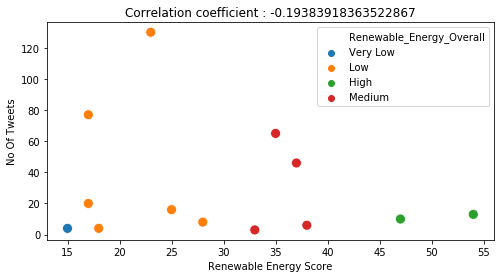

In [36]:
plt.figure(figsize = (8,4))
plot1 = sns.scatterplot(x='Renewable_Energy_Final_score', y='User_Name', data = correlation_df, s=100, hue='Renewable_Energy_Overall')
plot1 = plot1.set(xlabel='Renewable Energy Score', ylabel='No Of Tweets', title='Correlation coefficient : '+str(user_renewable_energy_coef))


Renewable Enery Score is the score of the country based on their support and adoption of renewable energy resources.

The higher the renewable energy score the better. 

From the scatterplot above we can see that the countries that tweet more are not the countries which are actually doing well on the renewable energy score. There is a negative correlation between these two values. 

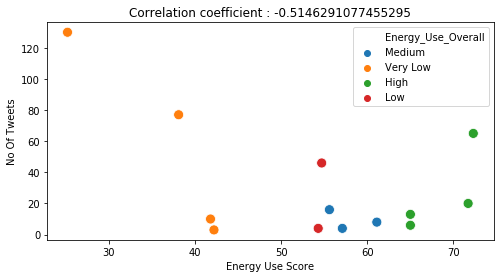

In [41]:
plt.figure(figsize = (8,4))
plot2 = sns.scatterplot(x='Energy_Use_Score', y='User_Name', data = correlation_df, s=100, hue='Energy_Use_Overall')
plot2 = plot2.set(xlabel='Energy Use Score', ylabel='No Of Tweets', title='Correlation coefficient : '+str(user_energy_use_coef))

Enery Use Score is the score of the country based on their energy consumption

The lower the energy score the better.

From the scatterplot above we can see that except for one the countries that tweet more are the countries which are actually using more energy than others.

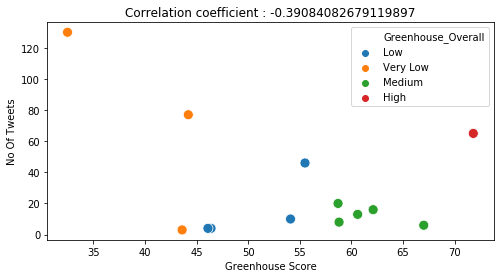

In [40]:
plt.figure(figsize = (8,4))
plot3 = sns.scatterplot(x='Greenhouse_Score', y='User_Name', data = correlation_df, s=100, hue='Greenhouse_Overall')
plot3 = plot3.set(xlabel='Greenhouse Score', ylabel='No Of Tweets', title='Correlation coefficient : '+str(user_greenhouse_coef))

Greenshouse Score is the score of the country based on their greenhouse emissions

The lower the greenshouse score the better.

From the scatterplot above we can see that except for one the countries that tweet more are the countries which are actually producing more greenshouse gases than others.

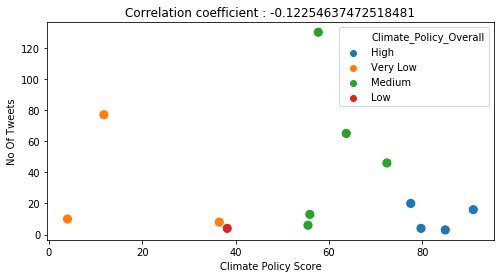

In [38]:
plt.figure(figsize = (8,4))
plot4 = sns.scatterplot(x='Climate_Policy_Score', y='User_Name', data = correlation_df, s=100,hue='Climate_Policy_Overall')
plot4 = plot4.set(xlabel='Climate Policy Score', ylabel='No Of Tweets', title='Correlation coefficient : '+str(user_climate_policy_coef))

CLimate Policy Score is the score of the country based on their regulations and policies on climate change

The higher the climate policy score the better.

From the scatterplot above we can see that the countries tweeting about climate change are somewhat evenly spread on the climat policy score.

#### In conclusion

From these scatterplots we can say that, the activity on twitter by these countries may not be a great indicator of their actual take on climate change and the policies they implement. It may also be hinting at a misalignment between the citizens and the policy makers. The citizens want environmental protection reforms and they are vocal about it but the leadership and policy makers are yet to align themselves with this demand. 